In [1]:
# import Library and some random image data set
import tensorflow as tf
import numpy      as np
import seaborn    as sns 
import pandas     as pd
import os
import matplotlib.pyplot as plt
np.random.seed(78); tf.set_random_seed(78)

# get some of the STL data set
# Get the certain STL 10 Data
from skimage import util 
from skimage.transform import resize
from skimage.io import imread
import warnings
warnings.filterwarnings("ignore")

def showimages(x,coloums=30,row=3,col=False):
    fig=plt.figure(figsize=(30, 3))
    columns = coloums; rows = row
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if col: plt.imshow(np.squeeze(x[i-1]))
        else:   plt.imshow(np.squeeze(x[i-1]),cmap='gray')
        plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        plt.grid(False)
    plt.show()

data_location = "../../Dataset/STL10/img/10/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))
train_batch1 = train_batch.copy()

data_location = "../../Dataset/STL10/img/2/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))
train_batch2 = train_batch.copy()

data_location = "../../Dataset/STL10/img/3/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))
train_batch3 = train_batch.copy()

Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]
Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]
Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]


(1500, 64, 64, 3)


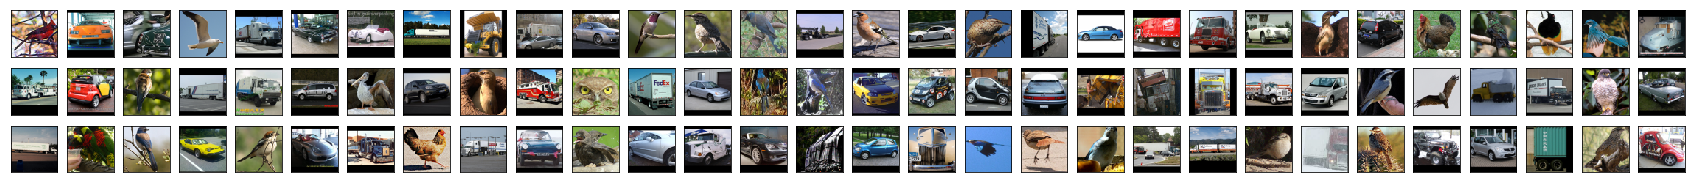

In [12]:
# show the random images
from sklearn.utils import shuffle
train_batch_final = np.vstack((train_batch1,train_batch2,train_batch3))
train_batch_final = shuffle(train_batch_final)
print(train_batch_final.shape)
showimages(shuffle(train_batch_final))

In [13]:
def tf_iden(x):  return x
def d_tf_iden(x):return 1.0

# a. Mean Layer - Subtract the Mean of the Data Row Wise

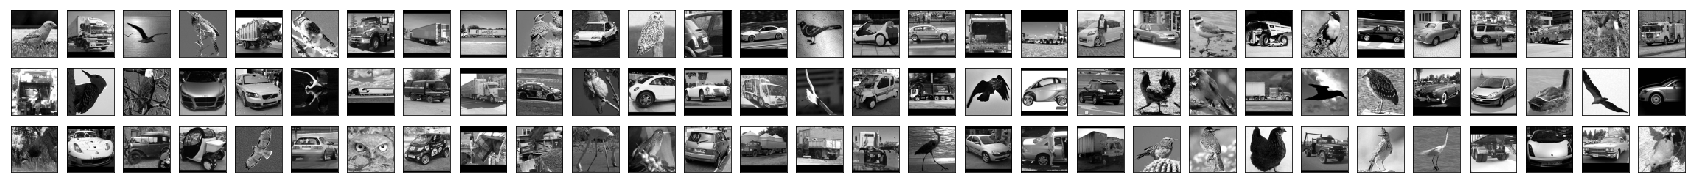

Before Mean Layer :  2713.704622395833
After  Mean Layer :  -2.0838365755171395e-16
Data    Mean :  0.424016347249349
Updated Mean :  0.0424016347249349
Gradient of Mean:  0.999755859375


In [17]:
# test out the mean layer (reset the graph)
tf.reset_default_graph()
class tf_mean_layer():
    
    def __init__(self,vector_shape):
        self.moving_mean = tf.Variable(tf.zeros(shape=[vector_shape,1],dtype=tf.float64))
        
    def feedforward(self,input,training_phase=True):
        self.input = input
        
        # Training Moving Average Mean         
        def training_fn():
            using_mean         = tf.reduce_mean(input,axis=-1)[:,None]
            centered_data      = self.input - using_mean
            return centered_data,tf.assign( self.moving_mean,self.moving_mean*0.9 + 0.1 * using_mean )
        
        # Testing Moving Average Mean        
        def  testing_fn():
            centered_data      = self.input - self.moving_mean
            return centered_data,tf.assign(self.moving_mean,self.moving_mean)
        
        self.output,update_mean = tf.cond(training_phase,true_fn=training_fn,false_fn=testing_fn)
        return self.output,update_mean
    
    def backprop(self,grad):
        return grad - 1.0/grad.shape[1].value
    
# make the place holder and start the session
x     = tf.placeholder(shape=(100,64*64),dtype=tf.float64)
phase = tf.placeholder(shape=[],dtype=tf.bool)

mean_layer             = tf_mean_layer(100)
mean_data,update_mean  = mean_layer.feedforward(x,training_phase=phase)
mean_grad              = mean_layer.backprop(tf.ones_like(mean_data))

sess = tf.InteractiveSession();  sess.run(tf.global_variables_initializer())
mean_result,mean_update,mean_gradient = sess.run([mean_data,update_mean,mean_grad],feed_dict={x:train_batch_final[:100,:,:,0].reshape((100,-1)),phase:True })
showimages(mean_result.reshape((100,64,64)),col=False)

print('Before Mean Layer : ',train_batch_final[:100,:,:,0].mean(-1).sum());  print('After  Mean Layer : ',mean_result.mean(-1).sum())
print('Data    Mean : ',     train_batch_final[:100,:,:,0].mean());          print('Updated Mean : ',   mean_update.mean())
print('Gradient of Mean: ',  mean_gradient.mean() )

# b. Standard Deviation Layer

In [18]:
tf.reset_default_graph()
class tf_std_layer():
    
    def __init__(self,vector_shape):
        self.moving_mean = tf.Variable(tf.zeros(shape=(vector_shape,1),dtype=tf.float64))
        
    def feedforward(self,input,training_phase=True):
        self.input = input

        self.using_mean     = tf.reduce_mean(input,axis=-1)[:,None]
        self.centered_data  = tf.square(self.input - self.using_mean)
        self.square_data    = tf.reduce_sum(self.centered_data,-1) 
        self.sqrt           = tf.sqrt(self.square_data / (self.input.shape[1].value -1 ) ) 

        # Training Moving Average Mean         
        def training_fn():
            return self.sqrt,tf.assign( self.moving_mean,self.moving_mean*0.9 + 0.1 * self.using_mean )
        
        # Testing Moving Average Mean        
        def  testing_fn():
            centered_data  = tf.square(self.input - self.moving_mean)
            square_data    = tf.reduce_sum(centered_data,-1) 
            sqrt           = tf.sqrt(square_data / (self.input.shape[1].value -1 ) ) 
            return sqrt,     tf.assign(self.moving_mean,self.moving_mean)
        
        self.output,update_mean = tf.cond(training_phase,true_fn=training_fn,false_fn=testing_fn)
        return self.output,update_mean
    
    def backprop(self,grad):
        grad1 = grad
        grad2 = 1.0/(self.sqrt) *(1/ (self.input.shape[1].value -1) )
#         grad3 = tf.sqrt(self.centered_data) * (1 - 1.0/self.input.shape[1].value)
        
        # this grad3 is for gradient check only don't use this         
        grad3 = (1 - 1.0/self.input.shape[1].value)
        grad_pass = (grad1 * grad2)[:,None] * grad3
        return grad_pass      
    
# make the place holder and start the session
x     = tf.placeholder(shape=(5,64*64),dtype=tf.float64)
phase = tf.placeholder(shape=[],dtype=tf.bool)

current_layer                = tf_std_layer(5)
current_data,current_update  = current_layer.feedforward(x,training_phase=phase)
current_grad                 = current_layer.backprop(tf.ones_like(current_data))

sess = tf.InteractiveSession();  sess.run(tf.global_variables_initializer())
current_result,current_r_update,current_gradient = sess.run([current_data,current_update,current_grad],feed_dict={x:train_batch_final[:5,:,:,0].reshape((5,-1)),phase:True })

print("Data std: ",train_batch_final[:5,:,:,0].reshape((5,-1)).std(-1) )
print("Updated Moving Mean: ",current_r_update.mean())
print('TF   std: ',current_result )
print('Gradient of STD: ',current_gradient )

Data std:  [0.26693036 0.26970105 0.15632355 0.09928429 0.32981167]
Updated Moving Mean:  0.0399749719956342
TF   std:  [0.26696295 0.26973397 0.15634264 0.09929641 0.32985193]
Gradient of STD:  [[0.00091451]
 [0.00090512]
 [0.00156157]
 [0.00245871]
 [0.00074015]]


# C. Normalization Layer - Range (Min - Max) - User Can Set this Value

Original Data Min :  [0.         0.         0.00245098 0.04779412 0.        ]
Original Data Max :  [0.98848039 1.         0.79117647 0.98161765 1.        ]
After Layer Min :  [0. 0. 0. 0. 0.]
After Layer Max :  [400. 400. 400. 400. 400.]
Moving Min :       [[0.         0.         0.0002451  0.00477941 0.        ]]
Moving Max :       [[0.09884804 0.1        0.07911765 0.09816176 0.1       ]]
OG Data 1.0(Max - Min) :  [1.01165386 1.         1.26786824 1.07086614 1.        ]
Min Max Gradient:  [[1.01165386 1.         1.26786824 1.07086614 1.        ]]
OG    Data Mean and STD:  0.39974971995634195 0.2410479100923243
After Data Mean and STD:  166.9224781092372 100.50061726249292


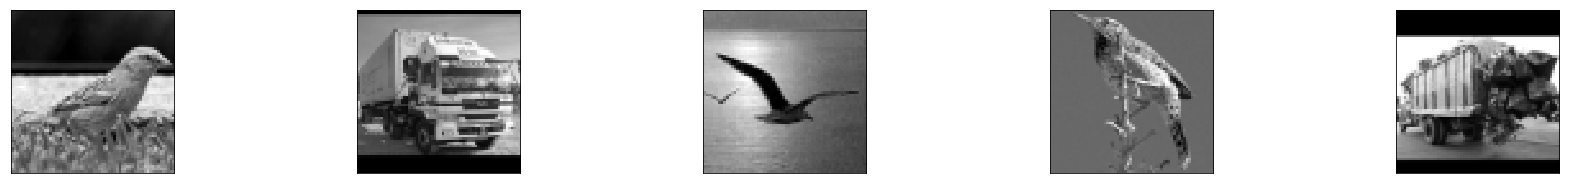

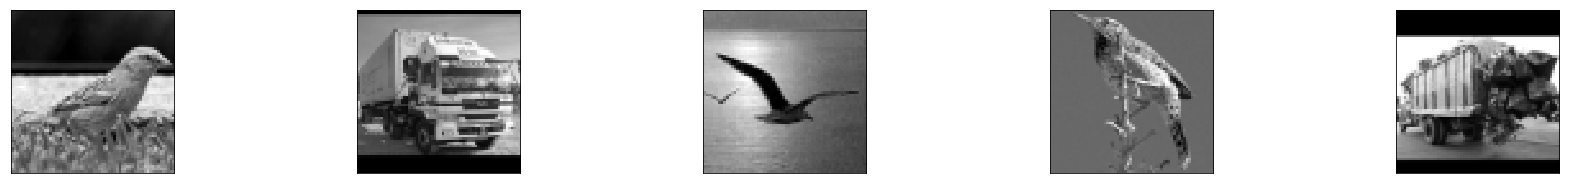

In [19]:
tf.reset_default_graph()
class tf_min_max_layer():
    
    def __init__(self,vector_shape,user_max=1.0,user_min=0.0):
        self.moving_min = tf.Variable(tf.zeros(shape=(vector_shape,1),dtype=tf.float64))
        self.moving_max = tf.Variable(tf.zeros(shape=(vector_shape,1),dtype=tf.float64))
        self.user_min   = tf.Variable(user_min,dtype=tf.float64); 
        self.user_max   = tf.Variable(user_max,dtype=tf.float64); 
        
    def feedforward(self,input,training_phase):
        self.input    = input
        self.min_vec  = tf.reduce_min(input,-1)[:,None]
        self.min_index= tf.argmin(input,-1)
        self.max_vec  = tf.reduce_max(input,-1)[:,None]
        self.max_index= tf.argmax(input,-1)
        
        def training_fn():
            normalized_data = (self.user_max-self.user_min)  * \
            ((self.input - self.min_vec)/(self.max_vec - self.min_vec))          + self.user_min
            
            update_min_max = []
            update_min_max.append(tf.assign(self.moving_min,self.moving_min * 0.9 + 0.1 * self.min_vec))
            update_min_max.append(tf.assign(self.moving_max,self.moving_max * 0.9 + 0.1 * self.max_vec))
            return normalized_data,update_min_max
        
        # Testing Moving Average Mean        
        def  testing_fn():
            normalized_data = (self.user_max-self.user_min) * \
            ((self.input - self.moving_min)/(self.moving_max - self.moving_min)) + self.user_min
            
            update_min_max = []
            update_min_max.append(tf.assign(self.moving_min,self.moving_min))
            update_min_max.append(tf.assign(self.moving_max,self.moving_max))
            return normalized_data,update_min_max
        
        self.output,update_min_max = tf.cond(training_phase,true_fn=training_fn,false_fn=testing_fn)
        return self.output,update_min_max
    
    def backprop(self,grad):
        grad1   = grad
        
        # Create Mask for min / max value for row
        indices = tf.range(0, self.input.shape[0].value,dtype=tf.int64)
        min_indices = tf.stack([indices, self.min_index], axis=1)
        max_indices = tf.stack([indices, self.max_index], axis=1)
        grad_min = tf.cast(tf.sparse_to_dense(min_indices, self.input.shape, sparse_values=1, default_value=0),dtype=tf.float64)
        grad_max = tf.cast(tf.sparse_to_dense(max_indices, self.input.shape, sparse_values=1, default_value=0),dtype=tf.float64)
        
        grad_max_min = 1.0/(self.max_vec-self.min_vec)
        grad_pass    = grad1 * (self.user_max-self.user_min) * (
            grad_max_min + \
            (self.input - self.max_vec)/tf.square(grad_max_min) * grad_min + \
            (self.min_vec - self.input)/tf.square(grad_max_min) * grad_max
        )
        
        # Again do not RETURN grad_magrad_passx_min correct gradient is grad_pass
        return grad_max_min
        
# make the place holder and start the session
x     = tf.placeholder(shape=(5,64*64),dtype=tf.float64)
phase = tf.placeholder(shape=[],dtype=tf.bool)

current_layer                = tf_min_max_layer(5,user_max=400.0,user_min=0.0)
current_data,current_update  = current_layer.feedforward(x,training_phase=phase)
current_grad                 = current_layer.backprop(tf.ones_like(current_data))
        
sess = tf.InteractiveSession();  sess.run(tf.global_variables_initializer())
vectorized_train_data = train_batch_final[:5,:,:,0].reshape((5,-1))
current_result,current_update,current_gradient = sess.run([current_data,current_update,current_grad],feed_dict={x:vectorized_train_data,phase:True}) 


print('Original Data Min : ',vectorized_train_data.min(-1))
print('Original Data Max : ',vectorized_train_data.max(-1))

print('After Layer Min : ',current_result.min(-1))
print('After Layer Max : ',current_result.max(-1))

print('Moving Min :      ',current_update[0].T)
print('Moving Max :      ',current_update[1].T)

print('OG Data 1.0(Max - Min) : ',1.0/(vectorized_train_data.max(-1)-vectorized_train_data.min(-1) ) )
print('Min Max Gradient: ',current_gradient.T )

print('OG    Data Mean and STD: ',vectorized_train_data.mean(),vectorized_train_data.std())
print('After Data Mean and STD: ',current_result.mean(),current_result.std())

showimages(vectorized_train_data.reshape((5,64,64)),coloums=5,row=1)
showimages(current_result.reshape((5,64,64)),coloums=5,row=1)

# D. Global Contrast Normalization Layer

Before GCN Data Mean and STD
0.4106869486889808 0.24544448944769853


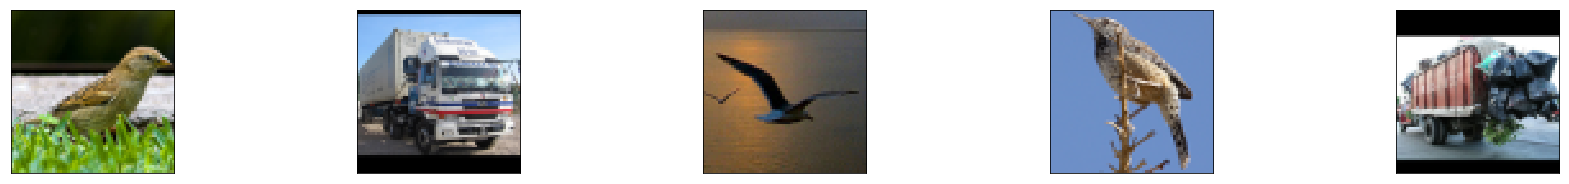

After GCN Data Mean and STD - VIEWING IMAGE IS NORMALIZED
-1.5019814096165855e-17 0.07731546656600721


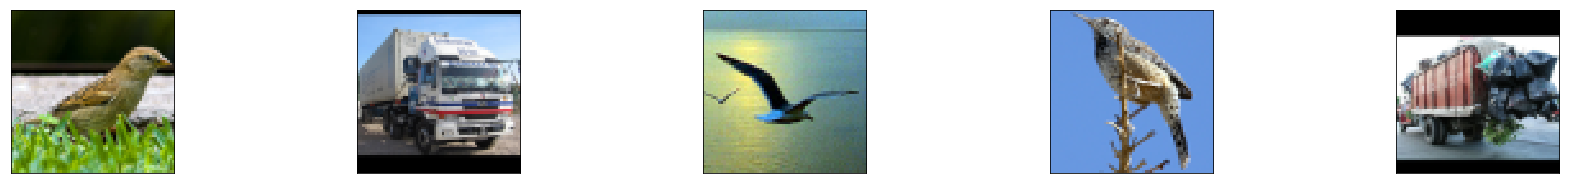

In [20]:
# Modified code from: https://datascience.stackexchange.com/questions/15110/how-to-implement-global-contrast-normalization-in-python
def global_contrast_normalization(image):
    XX = image

    # replacement for the loop
    X_average = np.mean(XX)
    XX = XX - X_average
    
    ss   = 1.0
    lmda = 10.
    # `su` is here the mean, instead of the sum
    contrast = np.sqrt(lmda + np.mean(XX**2)).astype(np.float64)
    
    if contrast > 1e-8:
        XX = ss * XX / contrast
    else:
        XX = ss * XX 

    return XX

vectorized_train_data_color = train_batch_final[:5,:,:,:].reshape((5,-1))
gcn_numpy = np.asarray([global_contrast_normalization(x) for x in vectorized_train_data_color]).reshape((5,64,64,3))

print('Before GCN Data Mean and STD')
print(vectorized_train_data_color.mean(-1).mean(),vectorized_train_data_color.std(-1).mean() )
showimages(vectorized_train_data_color.reshape((5,64,64,3)),coloums=5,row=1,col=True)

print('After GCN Data Mean and STD - VIEWING IMAGE IS NORMALIZED')
print(gcn_numpy.mean(axis=(1,2,3)).mean(),gcn_numpy.std(axis=(1,2,3)).mean() )
gcn_numpy = (gcn_numpy - gcn_numpy.min(axis=(1,2))[:,None,None,:] )/(gcn_numpy.max(axis=(1,2))-gcn_numpy.min(axis=(1,2)))[:,None,None,:]
showimages(gcn_numpy.reshape((5,64,64,3)),coloums=5,row=1,col=True)

Before GCN Data Mean and STD 0.4106869486889808 0.24544448944769853


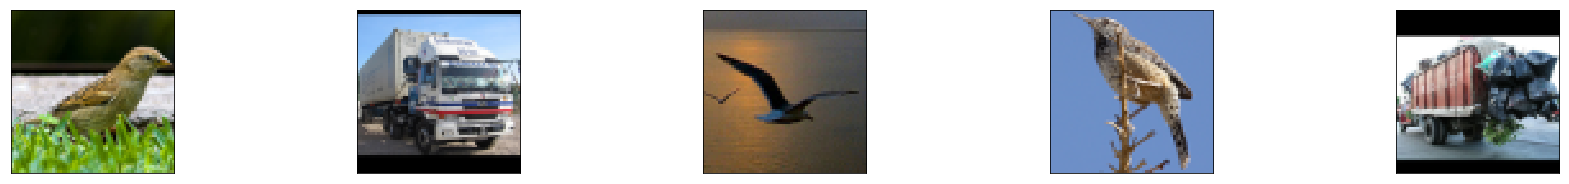

Data Mean and STD after layer -7.37257477290143e-18 0.07731546632246143


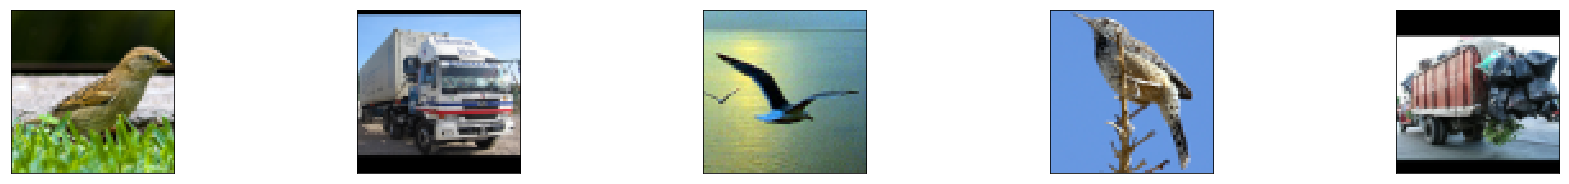

In [21]:
# tf layer implementation
tf.reset_default_graph()
class global_contrast_layer():
    
    def __init__(self,vector_shape,aimed_std=1.0):
        self.moving_mean = tf.Variable(tf.zeros(shape=(vector_shape,1),dtype=tf.float64))
        self.aimed_std   = tf.Variable(aimed_std,dtype=tf.float64)
        self.reg_lamda   = 10.0; self.EPS         = 1e-8
        
    def feedforward(self,input,training_phase):
        self.input      = input
        self.image_mean = tf.reduce_mean(self.input,-1)[:,None]
        self.centered   = self.input - self.image_mean
        self.square     = tf.square(self.centered)
        self.whole_mean = tf.reduce_mean(self.square,-1)[:,None]
        self.sqrt       = tf.sqrt(self.reg_lamda + self.whole_mean) + self.EPS
        
        def training_fn():
            gcn_data = self.aimed_std * (self.centered/self.sqrt)
            return gcn_data,tf.assign(self.moving_mean,self.moving_mean * 0.9 + 0.1 * self.image_mean)
        
        def  testing_fn():
            centered_data  = self.input - self.moving_mean
            squared_data   = tf.square(centered_data)
            whole_mean_data= tf.reduce_mean(squared_data,-1)[:,None]
            sqrt           = tf.sqrt(self.reg_lamda + whole_mean_data) + self.EPS
            gcn_data       = self.aimed_std * (centered_data/self.sqrt)
            return gcn_data, tf.assign(self.moving_mean,self.moving_mean)
        
        self.output,update_gcn_mean = tf.cond(training_phase,true_fn=training_fn,false_fn=testing_fn)
        return self.output,tf.assign(self.moving_mean,self.moving_mean)        
        
    def backprop(self,grad):
        grad_1 = grad
        grad_2 = self.aimed_std / self.sqrt
        grad_3 = -(self.centered ** 2 /self.sqrt ** 2) * (1.0/(self.sqrt-self.EPS)) / (self.input.shape[1].value)
        grad_pass = grad_1 * (grad_2 + grad_3) * (1-1./self.input.shape[1].value)
        return grad_pass
    
# make the place holder and start the session
x     = tf.placeholder(shape=(5,64*64*3),dtype=tf.float64)
phase = tf.placeholder(shape=[],dtype=tf.bool)

current_layer                = global_contrast_layer(5)
current_data,current_update  = current_layer.feedforward(x,training_phase=phase)
current_grad                 = current_layer.backprop(tf.ones_like(current_data))

sess = tf.InteractiveSession();  sess.run(tf.global_variables_initializer())
current_result,current_update,current_gradient = sess.run([current_data,current_update,current_grad],feed_dict={x:vectorized_train_data_color,phase:True}) 

print('Before GCN Data Mean and STD',vectorized_train_data_color.mean(-1).mean(),vectorized_train_data_color.std(-1).mean() )
showimages(vectorized_train_data_color.reshape((5,64,64,3)),coloums=5,row=1,col=True)

print('Data Mean and STD after layer',current_result.mean(-1).mean(),current_result.std(-1).mean())
current_result_reshape = current_result.reshape((5,64,64,3))
current_result_reshape = (current_result_reshape - current_result_reshape.min(axis=(1,2))[:,None,None,:] )/(current_result_reshape.max(axis=(1,2))-current_result_reshape.min(axis=(1,2)))[:,None,None,:]
showimages(current_result_reshape.reshape((5,64,64,3)),coloums=5,row=1,col=True)

# E. Reconstructive PCA Layer

Recon Data Mean and STD:  0.4000485609867903 0.18045477034358784
Gradient of Data :  -0.001328437683834835


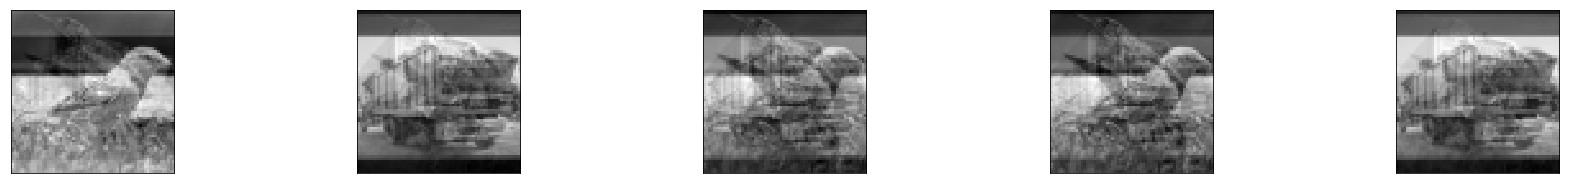

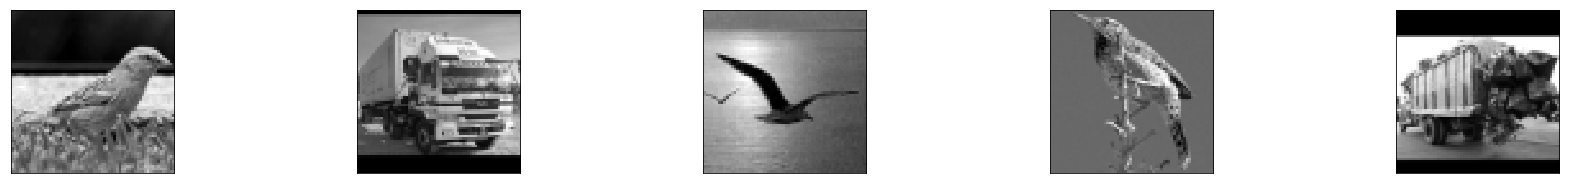

In [44]:
sess.close(); tf.reset_default_graph()
class Reconstructive_PCA():
    
    def __init__(self,n_components):
        self.n_components= tf.Variable(n_components,dtype=tf.int32)
        
    def feedforward(self,input):
        self.input  = input
        self.cov    = tf.matmul(self.input,tf.transpose(self.input)) / (self.input.shape[1].value-1)
        self.eigenvalues,self.eigenvectors  = tf.linalg.eigh(self.cov)
        self.projection_vector              = self.eigenvectors[:,-self.n_components:]
        self.reduced= tf.matmul(tf.transpose(self.projection_vector),self.input)
        self.reconst= tf.matmul(self.projection_vector,self.reduced)
        return self.reconst     
    
    def backprop(self,grad):
        grad1   = grad
        grad_A    = grad1 @ tf.transpose(tf.transpose(self.projection_vector) @ self.input) + \
                     tf.transpose(tf.transpose(self.projection_vector)@grad1@tf.transpose(self.input))
        diff      = self.input.shape[0].value - self.n_components
        added_mat = tf.zeros([self.input.shape[0].value,diff],dtype=tf.float64)
        grad_A_add= tf.concat([added_mat,grad_A],1)
        
        dia_eig   = tf.ones((self.input.shape[0].value,1),dtype=tf.float64) @ tf.transpose(self.eigenvalues)[None,:] - \
                    self.eigenvalues[:,None] @ tf.ones((1,self.input.shape[0].value),dtype=tf.float64)
        diag_k    = 1./(dia_eig + tf.eye(self.input.shape[0].value,dtype=tf.float64)) - tf.eye(self.input.shape[0].value,dtype=tf.float64)
        
        grad_B    = self.eigenvectors @ ( tf.transpose(diag_k)* (tf.transpose(self.eigenvectors)@ grad_A_add)) @ tf.transpose(self.eigenvectors)
        grad_B    = 0.5 * (tf.transpose(grad_B) + grad_B)
        grad_c    = (grad_B @ self.input + tf.transpose(tf.transpose(self.input) @ grad_B))/(self.input.shape[1].value-1)
        return grad_c
        
# make the place holder and start the session
x     = tf.placeholder(shape=(5,64*64),dtype=tf.float64)

current_layer     = Reconstructive_PCA(2)
current_data      = current_layer.feedforward(x)
current_grad      = current_layer.backprop(tf.ones_like(current_data))
        
sess = tf.InteractiveSession() ; sess.run(tf.global_variables_initializer())
vectorized_train_data = train_batch_final[:5,:,:,0].reshape((5,-1))
current_result,current_gradient = sess.run([current_data,current_grad],feed_dict={x:vectorized_train_data}) 

print('Recon Data Mean and STD: ',current_result.mean(),current_result.std())
print("Gradient of Data : ",      current_gradient.mean() ) 
showimages(current_result.reshape((5,64,64,1)),coloums=5,row=1,col=False)
showimages(train_batch_final[:5,:,:,0].reshape((5,64,64,1)),coloums=5,row=1,col=False)

Mean and STD of High Level API (Inverse):  0.379019224877451 0.196708496819985


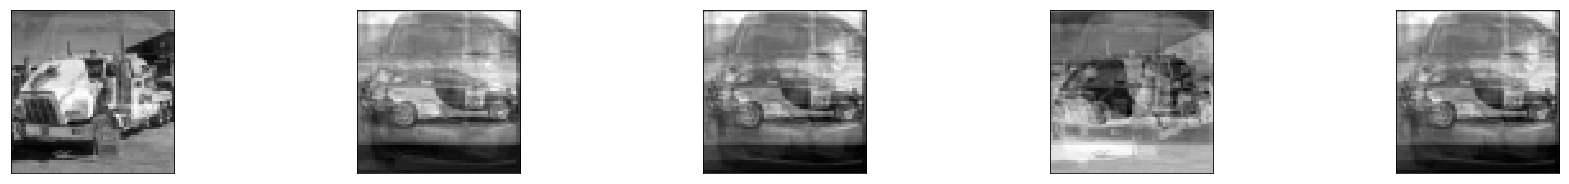

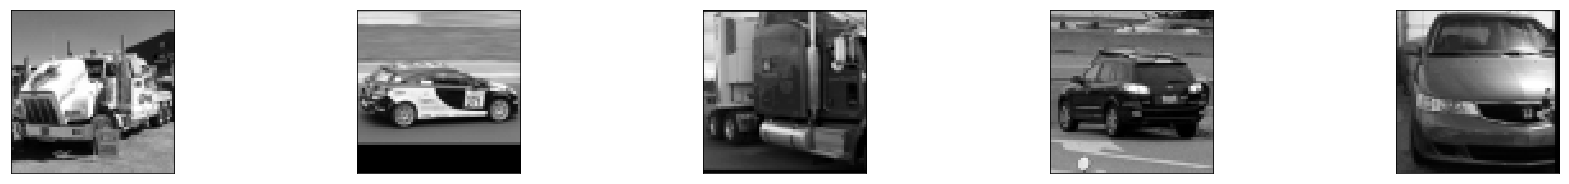

Mean and STD of High Level API (Inverse):  0.379019224877451 0.196708496819985


In [11]:
# Sanity Check using High Level API
from sklearn.decomposition import PCA
sk_pca = PCA(2)
sk_pca_data = sk_pca.fit_transform(vectorized_train_data.T).T
sk_pca_inve = sk_pca.inverse_transform(sk_pca_data.T).T
print('Mean and STD of High Level API (Inverse): ',sk_pca_inve.mean(),sk_pca_inve.std())
showimages(sk_pca_inve.reshape((5,64,64,1)),coloums=5,row=1,col=False)
showimages(vectorized_train_data.reshape((5,64,64,1)),coloums=5,row=1,col=False)
print('Mean and STD of High Level API (Inverse): ',sk_pca_inve.mean(),sk_pca_inve.std())